In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, plot_roc_curve, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# do this for all variables
df.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

In [8]:
df.dropna(subset = ['RainTomorrow'], inplace = True)

In [9]:
df.drop(columns = ['Evaporation', 'Date'], inplace=True, axis=1)

In [10]:
df.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)

In [11]:
df.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)

In [12]:
sunshine = {
    'Adelaide': {1:10.5, 2:10.1, 3:8.6, 4:7.3, 5:5.4, 6:4.5, 7:4.7, 8:6.1, 9:6.8, 10:8.3, 11:9.1, 12:9.5},
    'Albany': {1:8.1, 2:7.4, 3:6.6, 4:6.2, 5:5.4, 6:5.1, 7:5.5, 8:6.1, 9:6.3, 10:6.8, 11:7.4, 12:7.9},
    'Albury': {1:12.1, 2:11.2, 3:9.7, 4: 8.1, 5:5.9, 6:4.9, 7: 4.6, 8:5.9, 9:7.5, 10:9.5, 11:10.9, 12:12},
    'AliceSprings': {1:10.2, 2:9.8, 3:9.7, 4:9.5, 5:8.5, 6:8.4, 7:9.1, 8:9.9, 9:10.0, 10:10.1, 11:10.1, 12:10},
    'Ballarat': {1:10.2, 2:9.3, 3:7.9, 4:6.4, 5:4.6, 6:3.8, 7: 3.9, 8:4.6, 9:5.9, 10:7.2, 11:8.4, 12:9.6},
    'Bendigo': {1:11.9, 2:11.1, 3:9.5, 4:8, 5:5.8, 6:4.9, 7:4.8, 8:5.7, 9:7.2, 10:8.9, 11:10.4, 12:11.6},
    'Brisbane': {1:7.4, 2:6.6, 3:6.5, 4:7.2, 5:6.9, 6:6.8, 7:7.4, 8:7.9, 9:8.2, 10:8.0, 11:8.4, 12:8.1},
    'Cairns': {1:6.8, 2:6.2, 3:6.5, 4:6.8, 5:6.8, 6:7.2, 7:7.4, 8:8.1, 9:8.7, 10:8.8, 11:8.5, 12:7.8},
    'Canberra': {1:9.5, 2:9.0, 3:8.1, 4:7.3, 5:6.0, 6:5.2, 7:5.8, 8:7.0, 9:7.7, 10:8.6, 11:8.9, 12:9.4},
    'Cobar': {1:10.8, 2:10.3, 3:9.6, 4:8.9, 5:7.4, 6:6.4, 7:7.0, 8:8.4, 9:9.1, 10:9.8, 11:10.1, 12:10.6},
    'Darwin': {1:5.7, 2:5.9, 3:6.8, 4:8.8, 5:9.6, 6:10.0, 7:10.2, 8:10.4, 9:9.9, 10:9.5, 11:8.4, 12:6.9},
    'CoffsHarbour': {1:7.6, 2:7.3, 3:7.1, 4:7.2, 5:6.7, 6:6.6, 7:7.2, 8:8.3, 9:8.5, 10:8.1, 11:7.9, 12:7.9},
    'GoldCoast': {1:9.1, 2:8.8, 3:8.4, 4:8.4, 5:8.3, 6:7.8, 7:8.3, 8:8.8, 9:9.2, 10:9.1, 11:9.5, 12:9.6},
    'Hobart': {1:8.2, 2:7.9, 3:6.7, 4:5.9, 5:4.7, 6:4.3, 7:4.8, 8:5.7, 9:6.3, 10:7.4, 11:7.4, 12:7.9},
    'Katherine': {1:8.7, 2:8.6, 3:9.1, 4:9.7, 5:9.9, 6:9.9, 7:10.1, 8:10.4, 9:10.7, 10:11, 11:11, 12:10.1},
    'Launceston': {1:9.6, 2:8, 3:6.9, 4:5.6, 5:4.9, 6:4.3, 7:4.4, 8:4.9, 9:5.9, 10:7, 11:7.9, 12:9.2},
    'Melbourne': {1:9.0, 2:8.1, 3:6.8, 4:5.6, 5:3.9, 6:3.6, 7:3.7, 8:4.7, 9:5.7, 10:6.3, 11:7.0, 12:7.5},
    'MelbourneAirport': {1:8.8, 2:8.1, 3:7.2, 4:6.0, 5:4.7, 6:4.1, 7:4.4, 8:5.4, 9:6.2, 10:7.3, 11:7.5, 12:8.4},
    'Mildura': {1:10.8, 2:10.3, 3:9.6, 4:8.3, 5:6.6, 6:5.5, 7:5.9, 8:7.4, 9:8.2, 10:9.5, 11:10.0, 12:10.7},
    'Moree': {1:10.0, 2:9.8, 3:9.4, 4:9.1, 5:8.1, 6:7.1, 7:7.7, 8:9.0, 9:9.5, 10:9.7, 11:9.6, 12:10.0},
    'MountGambier': {1:9.1, 2:8.6, 3:6.9, 4:5.5, 5:4.4, 6:4.0, 7:4.3, 8:5.3, 9:5.7, 10:7.0, 11:7.5, 12:8.2},
    'Newcastle': {1:9.5, 2:9.2, 3:8.6, 4:8.1, 5:8, 6:7.4, 7:7.8, 8:8.6, 9:9.4, 10:9.4, 11:9.7, 12:10.1},
    'Nhil': {1:11.6, 2:10.8, 3:9.1, 4:7.6, 5:5.7, 6:5.1, 7:5.1, 8:6, 9:7, 10:8.5, 11:10, 12:11},
    'NorfolkIsland': {1:7.5, 2:7.1, 3:6.5, 4:6.5, 5:5.9, 6:5.2, 7:5.9, 8:6.7, 9:7.1, 10:7.5, 11:7.9, 12:7.7},
    'Nuriootpa': {1:10.6, 2:10.0, 3:8.7, 4:7.5, 5:5.7, 6:4.9, 7:5.1, 8:6.5, 9:7.2, 10:8.7, 11:9.6, 12:9.9},
    'PearceRAAF': {1:11.5, 2:10.9, 3:9.5, 4:8.1, 5:6.8, 6:6.0, 7:6.1, 8:7.1, 9:7.8, 10:9.5, 11:10.7, 12:11.5},
    'Penrith': {1:8.1, 2:7.3, 3:7.1, 4:7.4, 5:7.7, 6:7, 7:7.6, 8:8.4, 9:8.9, 10:8.7, 11:8.5, 12:8.8},
    'Perth': {1:10.6, 2:10.0, 3:8.9, 4:7.3, 5:5.9, 6:4.9, 7:5.3, 8:6.2, 9:7.2, 10:8.4, 11:9.8, 12:10.6},
    'PerthAirport': {1:11.5, 2:10.9, 3:9.5, 4:8.1, 5:6.8, 6:6.0, 7:6.1, 8:7.1, 9:7.8, 10:9.5, 11:10.7, 12:11.5},
    'Portland': {1:9.1, 2:8.6, 3:6.9, 4:5.5, 5:4.4, 6:4.0, 7:4.3, 8:5.3, 9:5.7, 10:7.0, 11:7.5, 12:8.2},
    'Richmond': {1:8.1, 2:7.4, 3:7.2, 4:7.3, 5:7.6, 6:6.9, 7:7.6, 8:8.4, 9:8.9, 10:8.7, 11:8.5, 12:8.9},
    'Sale': {1:8.4, 2:7.7, 3:6.8, 4:6.1, 5:4.9, 6:4.4, 7:5.0, 8:5.8, 9:6.4, 10:7.0, 11:7.5, 12:7.9},
    'SalmonGums': {1:9.9, 2:8.8, 3:7.9, 4:7.4, 5:6.4, 6:6.2, 7:5.8, 8:6.5, 9:7.7, 10:8.5, 11:9.5, 12:10.2},
    'Sydney': {1:7.1, 2:6.7, 3:6.4, 4:6.4, 5:5.9, 6:5.5, 7:6.4, 8:7.1, 9:7.2, 10:7.2, 11:7.8, 12:7.6},
    'SydneyAirport': {1:7.5, 2:7.2, 3:6.8, 4:7.0, 5:6.4, 6:5.9, 7:6.7, 8:7.9, 9:8.0, 10:7.9, 11:7.7, 12:7.8},
    'Townsville': {1:8.0, 2:7.4, 3:7.5, 4:7.9, 5:7.5, 6:7.8, 7:8.4, 8:9.1, 9:9.6, 10:9.8, 11:9.5, 12:9.0},
    'Tuggeranong': {1:9.9, 2:8.6, 3:8, 4:7, 5:6.2, 6:5, 7:5.4, 8:6.4, 9:7.7, 10:8.6, 11:9.3, 12:10.2},
    'Uluru': {1:9.2, 2:8.6, 3:8.6, 4:8.1, 5:7.2, 6:6.3, 7:7.3, 8:8, 9:8.6, 10:9.4, 11:9.1, 12:9.4},
    'WaggaWagga': {1:10.8, 2:10.1, 3:9.3, 4:8.2, 5:6.3, 6:4.6, 7:4.8, 8:6.4, 9:7.6, 10:9.2, 11:9.7, 12:10.4},
    'Walpole': {1:8.3, 2:7.1, 3:6.2, 4:4.8, 5:4.5, 6:4.2, 7:4.3, 8:5.0, 9:5.3, 10:6.4, 11:6.5, 12:8.1},
    'Watsonia': {1:7.9, 2:7.9, 3:6.7, 4:5.6, 5:4.0, 6:3.4, 7:3.7, 8:4.9, 9:5.5, 10:6.7, 11:7.2, 12:7.1},
    'Williamtown': {1:7.4, 2:7.2, 3:7.0, 4:6.9, 5:6.1, 6:5.6, 7:6.4, 8:7.5, 9:7.7, 10:7.6, 11:7.6, 12:7.7},
    'Witchcliffe': {1:9.6, 2:9.1, 3:7.9, 4:6.9, 5:6, 6:5.8, 7:5.5, 8:5.8, 9:5.9, 10:6.7, 11:8.6, 12:9.1},
    'Wollongong': {1:8.9, 2:8.3, 3:8, 4:8, 5:8.1, 6:7.4, 7:7.9, 8:8.5, 9:9.1, 10:9.1, 11:9.2, 12:9.5},
    'Woomera': {1:11.0, 2:10.5, 3:9.7, 4:8.8, 5:7.5, 6:6.9, 7:7.3, 8:8.4, 9:9.1, 10:9.7, 11:10.4, 12:10.6}
}

In [13]:
for loc, sun in sunshine.items():
    for month, hours in sun.items():
        df.loc[((df.Location == loc) & (df.Sunshine.isnull()) & (df.Month == month)), 'Sunshine'] = hours

In [14]:
df.Cloud9am.value_counts()

7.0    19749
1.0    15558
8.0    14389
0.0     8587
6.0     8072
2.0     6442
3.0     5854
5.0     5510
4.0     4373
9.0        2
Name: Cloud9am, dtype: int64

In [15]:
df.drop(df[df['Cloud9am'] == 9.0].index, inplace=True, axis=0)

In [16]:
df.Cloud9am.value_counts()

7.0    19749
1.0    15558
8.0    14389
0.0     8587
6.0     8072
2.0     6442
3.0     5854
5.0     5510
4.0     4373
Name: Cloud9am, dtype: int64

In [17]:
df.drop(df[df['Cloud3pm'] == 9.0].index, inplace=True, axis=0)

In [18]:
df.Cloud3pm.value_counts()

7.0    18052
1.0    14827
8.0    12407
6.0     8869
2.0     7153
3.0     6835
5.0     6743
4.0     5254
0.0     4957
Name: Cloud3pm, dtype: int64

In [19]:
df2 = df.copy()

In [ ]:
features = ['Sunshine', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features:
    qupper = df2[feature].quantile(0.99)
    df2 = df2.loc[(df2[feature].isna()) | (df2[feature] < qupper)]

In [ ]:
df2.info()

In [ ]:
df2.isna().sum()

In [20]:
X = df2.drop('RainTomorrow', axis=1)
y = df2['RainTomorrow']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
y_train.to_csv("y_train.csv")

In [ ]:
y_test.to_csv("y_test.csv")

In [26]:
cols_simp = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
simputer = SimpleImputer(strategy = 'most_frequent')
simputed = simputer.fit_transform(X_train[cols_simp])
df_simp_tranformed = pd.DataFrame(simputed, index=X_train.index, columns = cols_simp)

In [27]:
X_train_1 = X_train.copy()
X_train_1.drop(columns = cols_simp, axis=1, inplace=True)

In [28]:
X_train_imp = pd.concat((X_train_1, df_simp_tranformed), axis=1)

In [29]:
X_train_imp.head()

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,WindGustDir,WindDir9am,WindDir3pm,RainToday
89845,Cairns,20.0,28.0,0.0,6.8,24.0,6.0,13.0,76.0,77.0,...,1011.7,NaN,1.0,26.2,27.3,5,NNE,SW,NE,0
67385,Melbourne,10.0,18.6,0.2,12.9,56.0,31.0,26.0,56.0,39.0,...,1019.6,5.0,3.0,12.9,18.1,1,SSE,SW,SSE,0
39811,Williamtown,4.3,34.7,0.0,11.4,50.0,13.0,17.0,25.0,5.0,...,1008.2,1.0,0.0,22.2,32.6,10,W,NW,NW,0
110347,Albany,15.3,24.0,0.0,12.1,NaN,4.0,15.0,63.0,82.0,...,1016.7,3.0,3.0,21.8,21.8,1,W,SSW,SSW,0
119187,PerthAirport,4.8,17.0,0.0,7.4,39.0,13.0,22.0,54.0,30.0,...,1023.5,6.0,1.0,9.0,16.6,7,E,ENE,SE,0


In [32]:
cols_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month']
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
ohe_fit = ohe.fit_transform(X_train_imp[cols_encode])
ohe_df = pd.DataFrame(ohe_fit, columns = ohe.get_feature_names(cols_encode), index = X_train_imp.index)

In [33]:
X_train_int = X_train_imp.drop(cols_encode, axis=1)

In [34]:
X_train_ohe = pd.concat((X_train_int, ohe_df), axis=1)
X_train_ohe

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
89845,20.0,28.0,0.0,6.8,24.0,6.0,13.0,76.0,77.0,1015.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67385,10.0,18.6,0.2,12.9,56.0,31.0,26.0,56.0,39.0,1018.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39811,4.3,34.7,0.0,11.4,50.0,13.0,17.0,25.0,5.0,1015.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110347,15.3,24.0,0.0,12.1,NaN,4.0,15.0,63.0,82.0,1018.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119187,4.8,17.0,0.0,7.4,39.0,13.0,22.0,54.0,30.0,1025.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112923,8.2,14.6,44.2,5.9,93.0,30.0,39.0,NaN,NaN,1003.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
122813,7.9,23.7,0.0,11.0,33.0,9.0,17.0,71.0,49.0,1021.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
106282,14.8,31.9,0.0,13.5,37.0,11.0,19.0,38.0,12.0,1015.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135110,9.7,26.0,0.0,7.9,39.0,2.0,20.0,58.0,41.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
imputed = imputer.fit_transform(X_train_ohe)
X_train_KNNI = pd.DataFrame(imputed, index = X_train_ohe.index, columns = X_train_ohe.columns)
X_train_KNNI.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
89845,20.0,28.0,0.0,6.8,24.000000,6.0,13.0,76.0,77.0,1015.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67385,10.0,18.6,0.2,12.9,56.000000,31.0,26.0,56.0,39.0,1018.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39811,4.3,34.7,0.0,11.4,50.000000,13.0,17.0,25.0,5.0,1015.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110347,15.3,24.0,0.0,12.1,46.659307,4.0,15.0,63.0,82.0,1018.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119187,4.8,17.0,0.0,7.4,39.000000,13.0,22.0,54.0,30.0,1025.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train_KNNI.isna().sum().sum()

0

In [37]:
X_train_KNNI['Cloud9am'] = round(X_train_KNNI['Cloud9am'])

In [38]:
X_train_KNNI['Cloud3pm'] = round(X_train_KNNI['Cloud3pm'])

In [ ]:
X_train_KNNI.to_csv("X_train_KNNI.csv")

In [39]:
# Creating X_test dataset based on fits from X_train -> X_train_KNNI
simp_test = simputer.transform(X_test[cols_simp])
df_simp_test = pd.DataFrame(simp_test, index=X_test.index, columns=cols_simp)
X_test_1 = X_test.copy()
X_test_1.drop(columns=cols_simp, axis=1, inplace=True)
X_test_imp = pd.concat((X_test_1, df_simp_test), axis=1)

In [40]:
ohe_test = ohe.transform(X_test_imp[cols_encode])
df_ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names(cols_encode), index=X_test_imp.index)
X_test_2 = X_test_imp.copy()
X_test_2.drop(columns=cols_encode, axis=1, inplace=True)
X_test_ohe = pd.concat((X_test_2, df_ohe_test), axis=1)

In [41]:
X_test_Kimp = imputer.transform(X_test_ohe)
X_test_KNNI = pd.DataFrame(X_test_Kimp, index=X_test_ohe.index, columns=X_test_ohe.columns)

In [47]:
forestnoout = RandomForestClassifier(max_depth=13, random_state=42, min_samples_split=5)
forestnoout.fit(X_train_KNNI, np.ravel(y_train))

RandomForestClassifier(max_depth=13, min_samples_split=5, random_state=42)

In [43]:
def model_metrics(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    y_train_pred = model.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    f1_train = round(f1_score(y_train, y_train_pred), 3)
    cv = round(cross_val_score(model, X_train, y_train).mean(), 3)
    
    # calculate test data metrics
    y_test_pred = model.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    f1_test = round(f1_score(y_test, y_test_pred), 3)
    
    # print metrics
    print(f"""
    {name} Model Training Metrics:
    Accuracy Score: {accuracy_train}
    Recall Score: {recall_train}
    Precision Score: {precision_train}
    F1 Score: {f1_train}
    Cross Validation Score: {cv}
    ------
    {name} Model Test Metrics:
    Accuracy Score: {accuracy_test}
    Recall Score: {recall_test}
    Precision Score: {precision_test}
    F1 Score: {f1_test}
    """)
    
    # plot confusion matrices & roc curves
    print(f"{name} Model Training Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_train, y_train, cmap='rocket'))
    print(f"{name} Model Training ROC Curve")
    plt.show(plot_roc_curve(model, X_train, y_train))
    print(f"{name} Model Test Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_test, y_test, cmap='rocket'))
    print(f"{name} Model Test ROC Curve")
    plt.show(plot_roc_curve(model, X_test, y_test))


    forestnoout Model Training Metrics:
    Accuracy Score: 0.874
    Recall Score: 0.51
    Precision Score: 0.878
    F1 Score: 0.645
    Cross Validation Score: 0.848
    ------
    forestnoout Model Test Metrics:
    Accuracy Score: 0.847
    Recall Score: 0.439
    Precision Score: 0.776
    F1 Score: 0.561
    
forestnoout Model Training Confusion Matrix


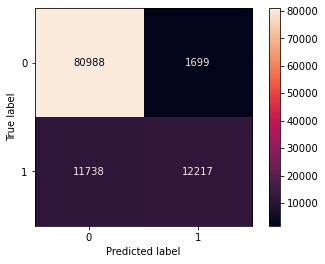

forestnoout Model Training ROC Curve


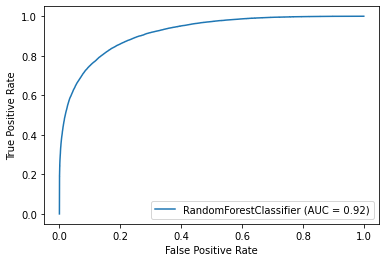

forestnoout Model Test Confusion Matrix


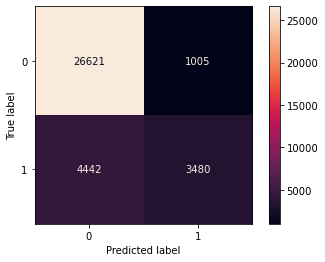

forestnoout Model Test ROC Curve


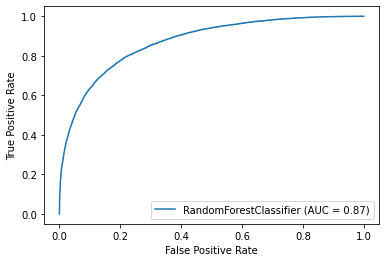

In [48]:
model_metrics(forestnoout, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'forestnoout')

In [45]:
X_test_KNNI['Cloud9am'] = round(X_test_KNNI['Cloud9am'])

In [46]:
X_test_KNNI['Cloud3pm'] = round(X_test_KNNI['Cloud3pm'])

In [ ]:
X_test_KNNI.to_csv("X_test_KNNI.csv")